In [1]:
import pandas as pd
import numpy as np

In [27]:
rawdata = pd.read_csv('~/Desktop/uc2_rawdata.csv', sep=',')
rawdata.head()
#rawdata.describe()

,originalqueueid,WorkItemId,UserId,caseType,acceptdatetime,Date_of_the_week,closeddate,UserID-QueueID-CaseType,CaseCompletedPerMonth,CasesReopenedPerMonth,...,TYPE_RequestLicenseFile,TYPE_Return,TYPE_RequestPreviousVersionSerial#,TYPE_HULArequestorextension,TYPE_GeneralRegistrationHelp,TYPE_General,TYPE_StandaloneLicensingConfiguration,TYPE_DeploymentTroubleshooting,TYPE_Configuration(productinstalled),TYPE_DownloadHelp
0,00G3A000004bYHTUA2,a9Y3A000000CaUVUA0,00530000005ff68AAA,Product Questions,7/26/2016 7:25,3,7/28/2016 2:00,00530000005ff68AAA-00G3A000004bYHTUA2,0.569699,22.446135,...,0,0,0,0,0,0,0,0,0,0
1,00G3A000004bYHSUA2,a9Y3A000000CaUaUAK,00530000005ff68AAA,Product Questions,7/27/2016 8:55,4,7/27/2016 9:00,00530000005ff68AAA-00G3A000004bYHSUA2,0.113940,3.873952,...,0,0,0,0,0,0,0,0,0,0
2,00G3A000004bYHSUA2,a9Y3A000000CaUpUAK,00530000003vGM0AAM,Product Questions,7/28/2016 8:20,5,7/28/2016 11:33,00530000003vGM0AAM-00G3A000004bYHSUA2,0.168426,2.021108,...,0,0,0,0,0,0,0,0,0,0
3,00G3A000004bYHTUA2,a9Y3A000000CaUuUAK,00530000003vGM0AAM,Product Questions,7/28/2016 8:31,5,7/29/2016 7:38,00530000003vGM0AAM-00G3A000004bYHTUA2,0.336851,4.547492,...,0,0,0,0,0,0,0,0,0,0
4,00G3A000004bYHTUA2,a9Y3A000000CaVOUA0,00530000005ff68AAA,Product Questions,7/29/2016 9:04,6,7/29/2016 9:10,00530000005ff68AAA-00G3A000004bYHTUA2,0.569699,22.446135,...,0,0,0,0,0,0,0,0,0,0


In [29]:
var_to_drop = ["WorkItemId", "acceptdatetime", "closeddate", "UserID-QueueID-CaseType"]
rawdata = rawdata.drop(var_to_drop, axis =1)
rawdata.shape

(1402, 69)

In [30]:
##categorical variables converts to Dummys
def make_dummies(df, variables):
    for variable in variables:
        dummies = pd.get_dummies(df[variable], prefix = variable)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(variable, axis = 1)
    return df

final_data = make_dummies(rawdata, ["caseType", "originalqueueid", "UserId"])

In [31]:
rawdata.shape

(1402, 69)

In [32]:
final_data.shape

(1402, 154)

In [34]:
pd.DataFrame(final_data.columns, columns=['Column_Name'])

,Column_Name
0,Date_of_the_week
1,CaseCompletedPerMonth
2,CasesReopenedPerMonth
3,CasesReroutedPerMonth
4,UserCapacity
5,ExperienceInMonths
6,ResolutionTIme-WorkingTime
7,CaseResolutionTIme
8,UPS_X00e30000001UueC_263_21_04_15_257
9,UPS_Omni_Channel_Callback_Permission_Set


In [51]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = final_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.title("Correlation Matrix Visualization",fontsize=18)

In [54]:
X_final = final_data.drop("ResolutionTIme-WorkingTime", axis=1)
y_target = pd.Series(final_data["ResolutionTIme-WorkingTime"])

In [55]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_target, test_size=0.2, random_state=42)

In [60]:
from sklearn import linear_model
ols = linear_model.LinearRegression()


In [76]:
ols.fit(X_train, y_train)
print (ols.score(X_train, y_train))
print (ols.score(X_test, y_test))

0.960338108553
0.97115343961


In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, ols.predict(X_train))

1.4446646499186417

In [79]:
mean_squared_error(y_test, ols.predict(X_test))

1.2141478058271948

In [65]:
colnames = X_train.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Date_of_the_week,-5.871804e-02
CaseCompletedPerMonth,7.517130e-03
CasesReopenedPerMonth,-2.493537e-02
CasesReroutedPerMonth,-3.135777e-02
UserCapacity,1.443046e-01
ExperienceInMonths,-3.222695e-02
CaseResolutionTIme,9.511611e-01
UPS_X00e30000001UueC_263_21_04_15_257,-6.410678e-12
UPS_Omni_Channel_Callback_Permission_Set,-1.092401e-11
UPS_DocuSign_User,-8.613110e-13


In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
## coefficients
lasso = linear_model.Lasso() # create a lasso instance

/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:46

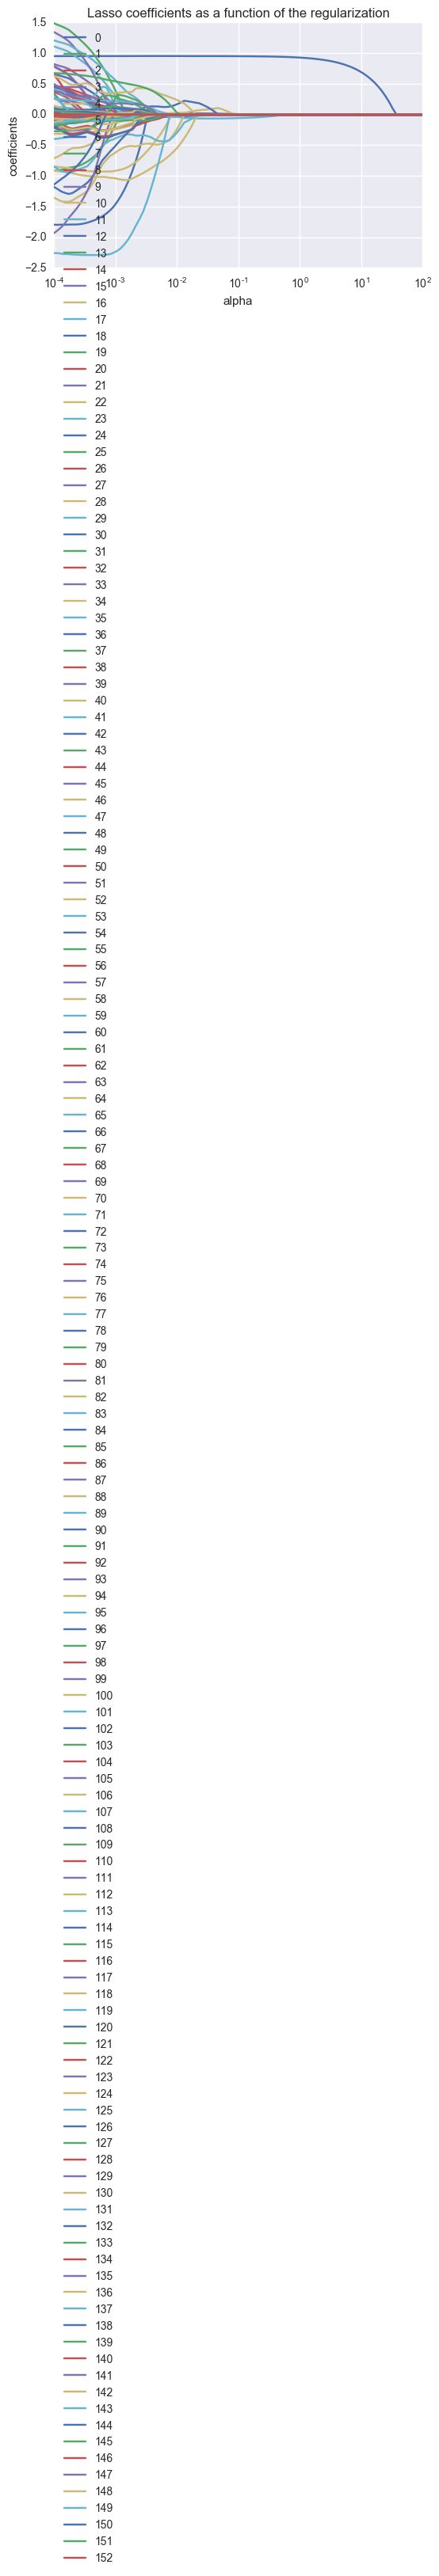

In [125]:
alphas_lasso = np.logspace(-4, 2, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)

df_coef = pd.DataFrame(coef_lasso, index = alphas_lasso)
df_coef.plot(logx = True, title = 'Lasso coefficients as a function of the regularization')
plt.xlabel('alpha')
plt.ylabel('coefficients')

In [102]:
df_coef.apply( lambda s : s.value_counts().get(0,0), axis=1)

0.000100       71
0.000115       72
0.000132       77
0.000152       77
0.000175       78
0.000201       79
0.000231       79
0.000266       81
0.000305       83
0.000351       87
0.000404       87
0.000464       89
0.000534       92
0.000614       94
0.000705       97
0.000811      101
0.000933      104
0.001072      105
0.001233      109
0.001417      111
0.001630      113
0.001874      111
0.002154      114
0.002477      117
0.002848      118
0.003275      119
0.003765      124
0.004329      127
0.004977      131
0.005722      133
             ... 
1.747528      151
2.009233      151
2.310130      151
2.656088      151
3.053856      151
3.511192      151
4.037017      151
4.641589      151
5.336699      151
6.135907      151
7.054802      151
8.111308      151
9.326033      151
10.722672     151
12.328467     152
14.174742     152
16.297508     152
18.738174     152
21.544347     152
24.770764     152
28.480359     152
32.745492     152
37.649358     153
43.287613     153
49.770236 

In [136]:
## coefficients
lasso = linear_model.Lasso(alpha = 1) # create a lasso instance
lasso.fit(X_train, y_train) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([-0.        ,  0.00196647, -0.00658458,  0.        ,  0.        ,
        -0.        ,  0.92786946,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0. 

In [137]:
## determination
print ("The determination of lasso regression is:%f" %lasso.score(X_train, y_train))
print (mean_squared_error(y_train, lasso.predict(X_train)))
print (mean_squared_error(y_test, lasso.predict(X_test)))
print (mean_squared_error(y_target, lasso.predict(X_final)))

The determination of lasso regression is:0.953896
1.67932651338
1.24339680587
1.59195401138


In [138]:
## coefficients
lasso_2 = linear_model.Lasso(alpha = 0.000811) # create a lasso instance
lasso_2.fit(X_train, y_train) # fit data
lasso_2.coef_, lasso_2.intercept_ # print out the coefficients

(array([ -5.27253725e-02,   1.51816741e-03,  -2.61294008e-03,
         -2.84470080e-03,   1.05748781e-01,  -3.86837376e-02,
          9.52275001e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [139]:
## determination
print ("The determination of lasso regression is:%f" %lasso_2.score(X_train, y_train))
print (mean_squared_error(y_train, lasso_2.predict(X_train)))
print (mean_squared_error(y_test, lasso_2.predict(X_test)))
print (mean_squared_error(y_target, lasso_2.predict(X_final)))

The determination of lasso regression is:0.959916
1.46005384275
1.1715913006
1.40223788388


In [158]:
## coefficients
lasso_3 = linear_model.Lasso(alpha = 0.0001) # create a lasso instance
lasso_3.fit(X_train, y_train) # fit data
lasso_3.coef_, lasso_3.intercept_ # print out the coefficients
## determination
print ("The determination of lasso regression is:%f" %lasso_3.score(X_train, y_train))
print (mean_squared_error(y_train, lasso_3.predict(X_train)))
print (mean_squared_error(y_test, lasso_3.predict(X_test)))
print (mean_squared_error(y_target, lasso_3.predict(X_final)))

The determination of lasso regression is:0.960298
1.44613732521
1.20501386244
1.39780944145


/Users/ruonanding/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [119]:
## coefficients
ridge = linear_model.Ridge() # cre

In [120]:
alpha_100 = np.logspace(0, 8, 100) # use to create the lines on the xlim, log scale
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coef.append(ridge.coef_)

In [122]:
coef = pd.DataFrame(coef, index = alpha_100)
coef

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
1.000000e+00,-0.056969,0.003819,-0.011094,-0.005381,0.126111,-0.022617,0.951594,0.0,0.0,0.0,...,1.946675e-01,1.193151e-01,1.250058e-01,2.356538e-02,2.998705e-01,3.771563e-02,-9.197949e-03,-4.038461e-01,2.942562e-02,1.773804e-01
1.204504e+00,-0.056737,0.003600,-0.010263,-0.004544,0.120745,-0.022440,0.951603,0.0,0.0,0.0,...,1.651645e-01,1.127599e-01,1.158446e-01,2.072239e-02,2.996071e-01,3.540834e-02,-1.532478e-02,-3.565870e-01,2.294825e-02,1.544239e-01
1.450829e+00,-0.056482,0.003387,-0.009466,-0.003774,0.115113,-0.022406,0.951609,0.0,0.0,0.0,...,1.385102e-01,1.064992e-01,1.066031e-01,1.757905e-02,2.979731e-01,3.325276e-02,-2.114498e-02,-3.120050e-01,1.634596e-02,1.330281e-01
1.747528e+00,-0.056202,0.003183,-0.008706,-0.003057,0.109308,-0.022546,0.951614,0.0,0.0,0.0,...,1.148273e-01,1.005414e-01,9.737623e-02,1.428343e-02,2.948409e-01,3.124423e-02,-2.654969e-02,-2.704572e-01,9.709626e-03,1.133200e-01
2.104904e+00,-0.055892,0.002985,-0.007988,-0.002373,0.103434,-0.022885,0.951616,0.0,0.0,0.0,...,9.412420e-02,9.488179e-02,8.826262e-02,1.099227e-02,2.901057e-01,2.937236e-02,-3.143541e-02,-2.321961e-01,3.149402e-03,9.538157e-02
2.535364e+00,-0.055548,0.002794,-0.007314,-0.001700,0.097596,-0.023447,0.951617,0.0,0.0,0.0,...,7.631210e-02,8.950587e-02,7.936192e-02,7.860413e-03,2.836917e-01,2.762303e-02,-3.570712e-02,-1.973737e-01,-3.205565e-03,7.925285e-02
3.053856e+00,-0.055164,0.002608,-0.006684,-0.001017,0.091898,-0.024247,0.951616,0.0,0.0,0.0,...,6.122484e-02,8.439190e-02,7.077115e-02,5.030321e-03,2.755596e-01,2.598059e-02,-3.928127e-02,-1.660483e-01,-9.210714e-03,6.493533e-02
3.678380e+00,-0.054734,0.002425,-0.006097,-0.000304,0.086440,-0.025292,0.951615,0.0,0.0,0.0,...,4.864015e-02,7.951339e-02,6.258027e-02,2.622536e-03,2.657157e-01,2.442999e-02,-4.208915e-02,-1.381943e-01,-1.471355e-02,5.239467e-02
4.430621e+00,-0.054252,0.002244,-0.005552,0.000458,0.081317,-0.026576,0.951612,0.0,0.0,0.0,...,3.829991e-02,7.484117e-02,5.486783e-02,7.277170e-04,2.542195e-01,2.295876e-02,-4.408063e-02,-1.137137e-01,-1.956482e-02,4.156415e-02
5.336699e+00,-0.053709,0.002063,-0.005046,0.001283,0.076609,-0.028081,0.951610,0.0,0.0,0.0,...,2.992838e-02,7.034526e-02,4.769723e-02,-5.990434e-04,2.411898e-01,2.155832e-02,-4.522839e-02,-9.244937e-02,-2.363229e-02,3.234882e-02


In [123]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ruonanding/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


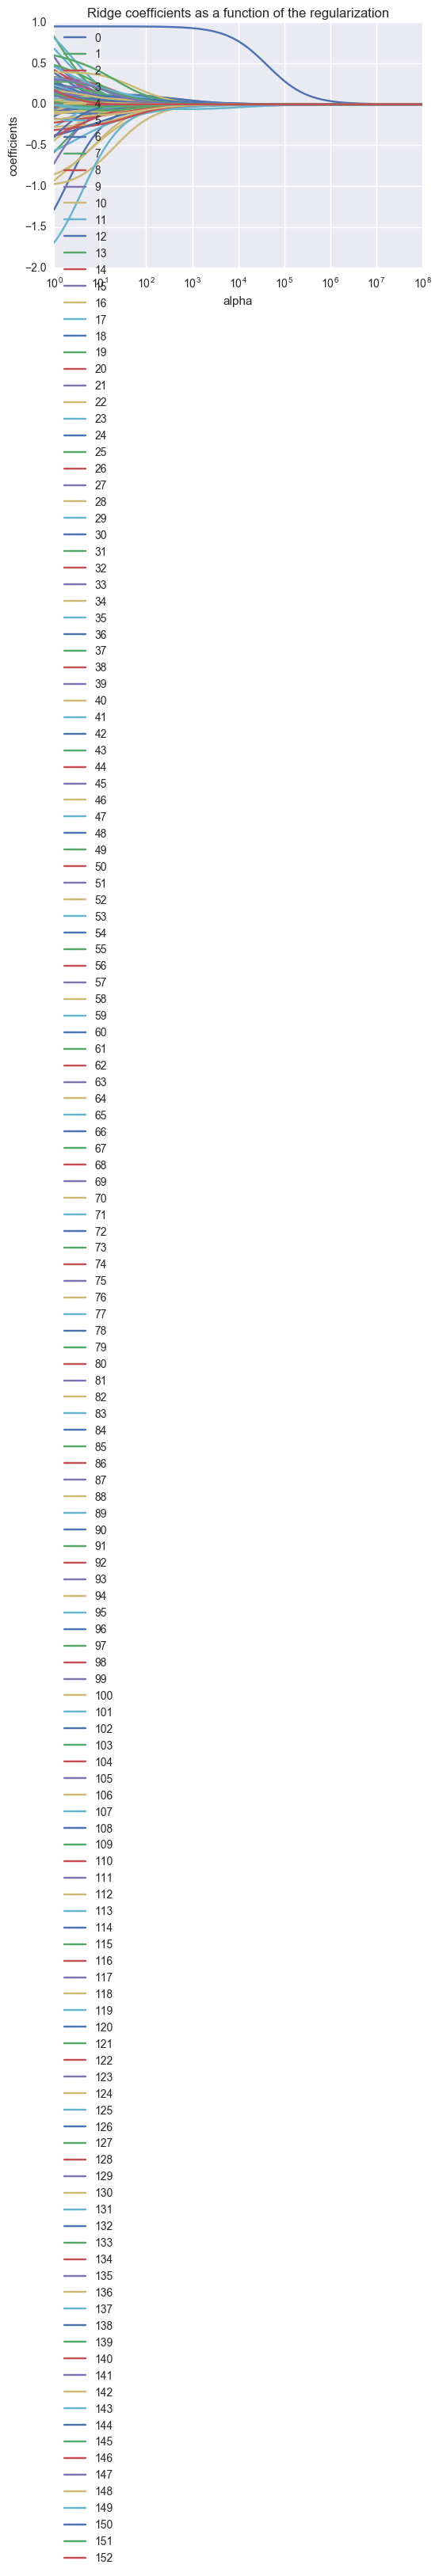

In [124]:
import matplotlib.pyplot as plt
coef.plot(logx = True, title = 'Ridge coefficients as a function of the regularization')
 # logx = True is to set the scale on the x-axis.
plt.xlabel('alpha')
plt.ylabel('coefficients')

In [152]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 0.5) # create a ridge regression instance
ridge.fit(X_train, y_train) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
## determination
print ("The determination of ridge regression is:%f" %ridge.score(X_train, y_train))
print (mean_squared_error(y_train, ridge.predict(X_train)))
print (mean_squared_error(y_test, ridge.predict(X_test)))
print (mean_squared_error(y_target, ridge.predict(X_final)))

The determination of ridge regression is:0.960230
1.4485914098
1.18570319408
1.395901261


In [131]:
from sklearn import linear_model
ridge_2 = linear_model.Ridge(alpha = 0.001) # create a ridge regression instance
ridge_2.fit(X_train, y_train) # fit data
ridge_2.coef_, ridge_2.intercept_ # print out the coefficients
## determination
print ("The determination of ridge regression is:%f" %ridge_2.score(X_train, y_train))
print (mean_squared_error(y_train, ridge_2.predict(X_train)))
print (mean_squared_error(y_test, ridge_2.predict(X_test)))
print (mean_squared_error(y_target, ridge_2.predict(X_final)))

The determination of ridge regression is:0.960338
1.44466679455
1.21398277075
1.39843126624


In [133]:
from sklearn import linear_model
ridge_3 = linear_model.Ridge(alpha = 0.00001) # create a ridge regression instance
ridge_3.fit(X_train, y_train) # fit data
ridge_3.coef_, ridge_3.intercept_ # print out the coefficients
## determination
print ("The determination of ridge regression is:%f" %ridge_3.score(X_train, y_train))
print (mean_squared_error(y_train, ridge_3.predict(X_train)))
print (mean_squared_error(y_test, ridge_3.predict(X_test)))
print (mean_squared_error(y_target, ridge_3.predict(X_final)))

The determination of ridge regression is:0.960338
1.44466465015
1.21414613128
1.39846229366
